In [1]:
%matplotlib inline
  
import sympy as sym
import numpy as np
from functools import partial

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

# loss functions

In [2]:
def shallownet_1d(w, a=1):
    f = a * w             # input-output map
    j = a                 # Jacobian of map
    err = f - 0           # target = 0
    loss = err ** 2 /2
    return loss, err, j 

def shallownet_2d(w, A = np.array([[1,2],[2,1]]) ):
    f = A @ w             # input-output map
    j = A                 # Jacobian of map
    err = f - 0           # target = 0
    loss = (err ** 2 /2).sum(axis=0)
    return loss, err, j 

def deepnet_1d(w, d=1):
    f = w ** d              # input-output map
    j = d * w ** (d-1)      # Jacobian of map
    err = f - 1             # target = 1
    loss = err ** 2 /2
    return loss, err, j 

In [3]:
def landscape(xy, py = np, n = 4, freq = None, a=None):
    if py == sym:
        x1,x2 = xy[0], xy[1]
    else:
        x1,x2 = xy[0,:], xy[1,:]
    
    if freq is None:
        freq = np.exp(np.linspace(-2,1,n))  
    if a is None:
        a = 1/freq 
    n = len(freq)

#     y1, y2 = x1.copy(), x2.copy()
    y1, y2 = x1 + 0, x2 + 0
    for i in range(n):
        y1 += a[i]* py.sin(freq[i]*x2) ;        y2 += a[i]* py.cos(freq[i]*x1) 

    c1, s1, c2, s2 = 0, 0, 0, 0 
    for i in range(n):
        s1 += a[i]* py.sin(freq[i]*y1) ;        c1 += a[i]* py.cos(freq[i]*y1) 
        s2 += a[i]* py.sin(freq[i]*y2) ;        c2 += a[i]* py.cos(freq[i]*y2) 

    z1 = y1 * s2 + c1 * y2  
    z2 = s1 * y2 + y1 * c2  
    
    if py == sym:
        err = sym.Array([z1, z2])
    else:
        err = np.array([z1, z2])
    
    loss = (z1**2 + z2**2)/2
        
    return loss, err, None #, freq, a

def landscape_simple(xy, py):
#     x1,x2 = xy[0,:], xy[1,:]
    x1,x2 = xy[0], xy[1]

    y1 = x1 + py.sin(x2);    y2 = py.cos(x1) + x2 
    z1 = y1 * py.sin(y2);    z2 = py.cos(y1) * y2 
    
    loss = z1 ** 2 + z2 ** 2 
    return loss, None, None
    
def landscape_simple2(xy):
    x1,x2 = xy[0,:], xy[1,:]

    y1 = x1 + np.sin(x2);    y2 = np.cos(x1) + x2 
    z1 = y1 * np.sin(y2) + np.cos(y1) * y2; 
    z2 = np.sin(y1) * y2 + y1 * np.cos(y2) 
    
    loss = z1 ** 2 + z2 ** 2 
    return loss, None, None


# sympy testing

In [4]:
w = sym.Symbol('w')
l, err, j = deepnet_1d(w,d=3)

print(l)
print(j, sym.diff(err, w))


(w**3 - 1)**2/2
3*w**2 3*w**2


In [5]:
x,y = sym.symbols('x y'); xy = sym.Array([x,y])
f1,f2 = sym.symbols('f1 f2'); 
a1,a2 = sym.symbols('a1 a2'); 

print(xy*2)
print(xy.applyfunc(lambda x: x**2))   
print(xy.diff(x))

[2*x, 2*y]
[x**2, y**2]
[1, 0]


In [6]:
l, err, _ = landscape(xy, py=sym, freq = [f1, f2], a = [a1, a2])
# print(l)
# print(err)
j = sym.diff(err, xy)
print(j[0,0])
# print(j[1,0])
# print(j[0,1])
# print(j[1,1])


a1*sin(f1*(a1*cos(f1*x) + a2*cos(f2*x) + y)) + a2*sin(f2*(a1*cos(f1*x) + a2*cos(f2*x) + y)) + (a1*cos(f1*(a1*sin(f1*y) + a2*sin(f2*y) + x)) + a2*cos(f2*(a1*sin(f1*y) + a2*sin(f2*y) + x)))*(-a1*f1*sin(f1*x) - a2*f2*sin(f2*x)) + (-a1*f1*sin(f1*(a1*sin(f1*y) + a2*sin(f2*y) + x)) - a2*f2*sin(f2*(a1*sin(f1*y) + a2*sin(f2*y) + x)))*(a1*cos(f1*x) + a2*cos(f2*x) + y) + (a1*f1*(-a1*f1*sin(f1*x) - a2*f2*sin(f2*x))*cos(f1*(a1*cos(f1*x) + a2*cos(f2*x) + y)) + a2*f2*(-a1*f1*sin(f1*x) - a2*f2*sin(f2*x))*cos(f2*(a1*cos(f1*x) + a2*cos(f2*x) + y)))*(a1*sin(f1*y) + a2*sin(f2*y) + x)


# Plotting

In [7]:
%matplotlib widget
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, X)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [12]:
%matplotlib widget
def plot_3d(fnc,  x0, y0 = None, zlim = None):
    if y0 is None:
        y0 = x0
        
    x, y = np.meshgrid(x0, y0); nx = len(x0); ny = len(y0)
    
    xy = np.concatenate((x.reshape([1,nx*ny]),y.reshape([1,nx*ny])),axis=0)

    outputs = fnc(xy)
    z = outputs[0].reshape([ny,nx])

    fig = plt.figure()
    # plt.contour(x,y,z, 50, cmap='binary')
    ax = plt.axes(projection='3d')
#     ax.contour3D(x,y,np.sqrt(z), 50, cmap='binary')
    surf = ax.plot_surface(x,y,np.sqrt(z), rstride=5, cstride=5, cmap=cm.hot,
                           linewidth=0, antialiased=False)

    # Customize the z axis.
    if zlim is not None:
        ax.set_zlim(zlim)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)

    ax.set_xlabel('x');ax.set_ylabel('y'); ax.set_zlabel('loss');

    plt.show()    

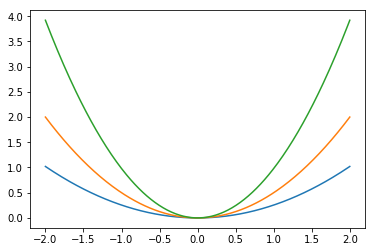

In [13]:
%matplotlib inline
x = np.linspace(-2, 2, 301)
for a in [1/1.4, 1, 1.4]:
    y, _, _ = shallownet_1d(x, a)
    plt.plot(x, y)
    
plt.show()

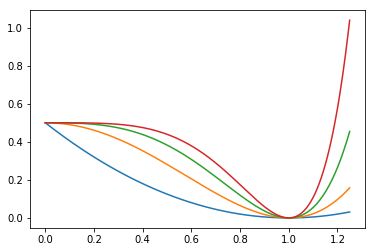

In [14]:
x = np.linspace(0, 1.25, 301)
for d in range(1,5):
    y, _, _ = deepnet_1d(x, d)
    plt.plot(x, y)
    
plt.show()

In [15]:
%matplotlib widget
nx = 101;  x0 = np.linspace(-2, 2, nx)
plot_3d(shallownet_2d, x0)

fnc = partial(shallownet_2d,  A=np.array([[-1,2],[2,-1]]) )
plot_3d(fnc, x0)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [16]:

x0 = np.linspace(0,16, 401);
plot_3d(landscape, x0, zlim=[40,200])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [17]:
# x0 = np.linspace(-2,5, 201)
# plot_3d(landscape_simple, x0)

# x0 = np.linspace(-4,10, 201)
# plot_3d(landscape_simple2, x0)

x0 = np.linspace(0,20, 301); #y0 = np.linspace(-20, 0, 201);
plot_3d(landscape, x0)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [20]:
x0 = np.linspace(-2,5, 201)
plot_3d(landscape_simple, x0, x0, sym)

x0 = np.linspace(-4,10, 201)
plot_3d(landscape_simple2, x0, x0, sym)

x0 = np.linspace(0,20, 301); #y0 = np.linspace(-20, 0, 201);
plot_3d(landscape, x0, x0, sym)

TypeError: landscape_simple() missing 1 required positional argument: 'py'